### Assignment 2:

### Give me some credit-



#### Abstract- 
    Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break   investment decisions. For markets and society to function, individuals and companies need access to credit. 

    Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. The Aim of this assignment requires us to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

    The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

    We implemnted H2o for regression and classification to find out the best model and best AUC and RMSE score for our dataset. 
The results we achieved are as follows: 

 - The best model for both Classification and regression is Stacked Ensemble
 - The best AUC score is 0.9538828675746901
 - The best logloss score is 0.13823047113084244
 - The best RMSE Value is 0.18729468157687296
 
   
   As AUC is area under the ROC (Receiver Operating Characteristic) Curve. To use this to evaluate a regression curve, a decision rule is used to covert the probabilities into a postive/negative result. AUC uses the confusion matrix (True Postive/False Positive/True Negative/False Negative). Taking the True Positive rate and the False Positive Rate under different thresholds for logisitic regression, they are plotted on a graph. The closer a model comes to 1 for AUC, the better it is.
   
Another method of evaluating a model could be mean-squared error. The disadvantage of mean-squared error as compared to AUC is that mean-squared error penalizes single large errors, while tolerates multiple smaller errors. This could lead to a lower score for a model that has a large error for a few values but predicts the rest of the values accurately, compared to a model that consistently gives small errors for each value. Based on our needs, we might prefer the first model over the second.
 

Prediction Problem - Predict the probability that somebody will experience financial distress in the next two years.

 - DELINQUENCY RATE:

The term "delinquent" commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan or a credit card account. There are consequences for being delinquent, depending on the type, duration and cause of the delinquency. People who are late with a credit card payment may be forced to pay a late fee. "Delinquent" also refers to the failure to perform a duty or act in a manner expected of a person in a particular profession or situation. For example, a police officer who does not act in a manner to fulfill his duty to protect could be found delinquent.


##### Dataset Description:

   - SeriousDlqin2yrs---Person experienced 90 days past due delinquency or worse 	Y/N
   - RevolvingUtilizationOfUnsecuredLines---Total balance on credit cards and personal lines of credit except real estate and        no installment debt like car loans divided by the sum of credit limits	percentage
   - age---Age of borrower in years	integer
   - NumberOfTime30-59DaysPastDueNotWorse---Number of times borrower has been 30-59 days past due but no worse in the last 2         years.	integer
   - DebtRatio---Monthly debt payments, alimony,living costs divided by monthy gross income	percentage
   - MonthlyIncome---Monthly income	real
   - NumberOfOpenCreditLinesAndLoans---Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g.       credit cards)	integer
   - NumberOfTimes90DaysLate---Number of times borrower has been 90 days or more past due.	integer
   - NumberRealEstateLoansOrLines---Number of mortgage and real estate loans including home equity lines of credit	integer
   - NumberOfTime60-89DaysPastDueNotWorse---Number of times borrower has been 60-89 days past due but no worse in the last 2         years.	integer
   - NumberOfDependents---Number of dependents in family excluding themselves (spouse, children etc.)	integer


In [473]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

In [474]:
df = pd.read_csv("C:\\Users\\Spurthy\\Documents\\cs-training.csv")

In [475]:
df.head(5)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


    describe() gives out a lot of information.

    Number of rows and columns in the dataset
    A number of summary statistics about the dataset such as
    Data type of the column such as integer, categorical etc
    Minimum value
    Mean value
    Maximum value
    Standard deviation value

   

In [476]:
df.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
count,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000,1.123230e+05,112323.000000,112323.000000,112323.000000,112323.000000,112323.000000
mean,0.067172,6.005897,52.275375,0.415596,357.465133,6.411766e+03,8.453140,0.259617,1.020975,0.233461,0.736991
std,0.250321,247.705056,14.761284,4.107521,2263.670105,1.381620e+04,5.134853,4.083151,1.129388,4.068274,1.106160
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030041,41.000000,0.000000,0.175201,3.300000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.155169,52.000000,0.000000,0.365833,5.136000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.562628,63.000000,0.000000,0.869070,7.876000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [477]:
target='serious_dlqin2yrs'
min_mem_size=6
run_time=333

In [478]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

1


### H2o:

    H2O is fast, scalable, open-source machine learning and deep learning for Smarter Applications. 

    H2O implements almost all common machine learning algorithms, such as generalized linear modeling (linear regression, logistic regression, etc.), Naïve Bayes, principal components analysis, time series, k-means clustering, and others. H2O also implements best-in-class algorithms such as Random Forest, Gradient Boosting, and Deep Learning at scale. Customers can build thousands of models and compare them to get the best prediction results.
    
   

In [479]:
# 65535 Highest port no
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53210..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.2+13, mixed mode)
  Starting server from C:\Users\Spurthy\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Spurthy\AppData\Local\Temp\tmpk5miljzq
  JVM stdout: C:\Users\Spurthy\AppData\Local\Temp\tmpk5miljzq\h2o_Spurthy_started_from_python.out
  JVM stderr: C:\Users\Spurthy\AppData\Local\Temp\tmpk5miljzq\h2o_Spurthy_started_from_python.err
  Server is running at http://127.0.0.1:53210
Connecting to H2O server at http://127.0.0.1:53210... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Spurthy_tv5k1n
H2O cluster total nodes:,1
H2O cluster free memory:,3.963 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [480]:
# Loading the CSV file
df = h2o.import_file(path = 'C:\\Users\\Spurthy\\Documents\\cs-training.csv')
#train["SeriousDlqin2yrs"] = train["SeriousDlqin2yrs"].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


### Train Models Using H2O's AutoML

     H2O’s AutoML is used for automating the machine learning workflow, which includes automatic training and tuning of many models within a user-specified time-limit. Stacked Ensembles will be automatically trained on collections of individual models to produce highly predictive ensemble models which, in most cases, will be the top performing models in the AutoML Leaderboard.

In [482]:
def get_independent_variables(df, targ):
    C = [name for name in df.columns if name != targ]
    # determine column types
    ints, reals, enums = [], [], []
    for key, val in df.types.items():
        if key in C:
            if val == 'enum':
                enums.append(key)
            elif val == 'int':
                ints.append(key)            
            else: 
                reals.append(key)    
    x=ints+enums+reals
    return x



In [483]:
X=get_independent_variables(df, target) 
print(X)

['age', 'number_of_time30-59_days_past_due_not_worse', 'monthly_income', 'number_of_open_credit_lines_and_loans', 'number_of_times90_days_late', 'number_real_estate_loans_or_lines', 'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents', 'revolving_utilization_of_unsecured_lines', 'debt_ratio']


In [484]:

# Set target and predictor variables
y = target

### Regression

    Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables.

    Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized.

In [485]:
# Set up AutoML

aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

In [486]:
model_start_time = time.time()
  
try:
  aml.train(x=X,y=y,training_frame=df)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [410]:

meta_data={}
meta_data['model_execution_time'] = {"regression":(time.time() - model_start_time)}

In [411]:

meta_data

{'model_execution_time': {'regression': 381.44484281539917}}

### Leaderboard

    Next, we will view the AutoML Leaderboard. Since we did not specify a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.

    A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC). In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

    The leader model is stored at aml.leader and the leaderboard is stored at aml.leaderboard.

In [412]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190301_154847,0.0498685,0.223313,0.0498685,0.0997707,0.156116
StackedEnsemble_BestOfFamily_AutoML_20190301_154847,0.0499245,0.223438,0.0499245,0.0999566,0.156283
GBM_5_AutoML_20190301_154847,0.05007,0.223763,0.05007,0.100283,0.156546
GBM_1_AutoML_20190301_154847,0.0504264,0.224558,0.0504264,0.100844,0.156846
GBM_2_AutoML_20190301_154847,0.0504723,0.22466,0.0504723,0.100681,0.156878
XRT_1_AutoML_20190301_154847,0.0505795,0.224899,0.0505795,0.101094,0.157774
GBM_3_AutoML_20190301_154847,0.0505796,0.224899,0.0505796,0.100565,0.157087
GBM_4_AutoML_20190301_154847,0.0506368,0.225026,0.0506368,0.10006,0.157304
DRF_1_AutoML_20190301_154847,0.0512305,0.226342,0.0512305,0.100663,0.159223
GBM_grid_1_AutoML_20190301_154847_model_2,0.053859,0.232075,0.053859,0.113469,0.159918


### Examine the Best Model

In [413]:

best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [414]:

best_model.algo

'stackedensemble'

Here We got our best model for regression is Stacked Ensemble

### Classification

    Classification and class probability estimation attempts to predict, for each individual in a population, to which class does this individual belongs to. Generally the classes are independent of each other.
    A Scoring model when applied to an individual produces a score representing the probability that the individual belongs to each class. In our customer response example, a scoring model can evaluate each individual customer and produce a score of how likely each customer is to respond to the offer. 

In [487]:
df[y] = df[y].asfactor()

In [488]:
df.describe()

Rows:112323
Cols:11




,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
type,enum,real,int,int,real,int,int,int,int,int,int
mins,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,,6.005897411355533,52.27537547964355,0.41559609340918613,357.4651328919827,6411.766192142301,8.453139606313934,0.2596173535251017,1.0209752232401204,0.23346064474773645,0.7369906430561862
maxs,,50708.0,109.0,98.0,329664.0,3008750.0,58.0,98.0,54.0,98.0,20.0
sigma,,247.70505630651013,14.761283520968048,4.107521260500588,2263.6701050002466,13816.202944926777,5.134852914037315,4.083151219236157,1.1293877371377157,4.068274013963124,1.1061604334440214
zeros,,8166,1,94267,3045,1860,1418,106024,41881,106605,68012
missing,0,0,0,0,0,0,0,0,0,0,0
0,0,0.957151019,40.0,0.0,0.121876201,2600.0,4.0,0.0,0.0,0.0,1.0
1,0,0.65818014,38.0,1.0,0.085113375,3042.0,2.0,1.0,0.0,0.0,0.0
2,0,0.233809776,30.0,0.0,0.036049682,3300.0,5.0,0.0,0.0,0.0,0.0


In [489]:
# Set up AutoML

aml = H2OAutoML(max_runtime_secs=run_time)

In [492]:
model_start_time = time.time()
  
try:
  aml.train(x=X,y=y,training_frame=df)  # Change training_frame=train
except Exception as e:
  logging.critical('aml.train') 
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()   
  sys.exit(4)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [493]:

d=meta_data['model_execution_time']
d['classification']=(time.time() - model_start_time)
meta_data['model_execution_time'] = d

In [494]:
meta_data

{'model_execution_time': {'classification': 380.9481301307678,
  'regression': 359.5283033847809}}

In [495]:

print(aml.leaderboard)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20190301_191420,0.846014,0.193077,0.28984,0.227027,0.0515414
StackedEnsemble_BestOfFamily_AutoML_20190301_191420,0.844625,0.193601,0.282639,0.227554,0.051781
XRT_1_AutoML_20190301_191420,0.842994,0.186246,0.288015,0.225174,0.0507032
GBM_4_AutoML_20190301_191420,0.839511,0.188284,0.283848,0.22643,0.0512704
GBM_3_AutoML_20190301_191420,0.837898,0.187452,0.286148,0.225375,0.0507937
GBM_2_AutoML_20190301_191420,0.8378,0.18689,0.293173,0.224791,0.050531
DRF_1_AutoML_20190301_191420,0.837108,0.189729,0.285753,0.226598,0.0513466
GBM_1_AutoML_20190301_191420,0.835814,0.187793,0.295386,0.225189,0.0507102
GLM_grid_1_AutoML_20190301_191420_model_1,0.701238,0.225532,0.367968,0.240387,0.057786


In [496]:
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])


In [497]:
best_model.algo

'stackedensemble'

For classification also we got our best model as Stacked Ensemble

In [500]:
print(best_model.rmse(train = True))

0.1799986431462912


In [498]:
print(best_model.auc(train = True))

0.9572753240493919


In [499]:

print(best_model.logloss(train = True))

0.13116402575786068


  - The best AUC score is 0.9538828675746901
  - The best logloss score is 0.13823047113084244
  - The best RMSE Value is 0.18729468157687296

In [501]:
cf=best_model.confusion_matrix(metrics=["f1","f2","f0point5","accuracy","precision","recall","specificity","absolute_mcc","min_per_class_accuracy","mean_per_class_accuracy"])
cf

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22090517696777381: 


,0,1,Error,Rate
0,103430.0,1348.0,0.0129,(1348.0/104778.0)
1,2918.0,4627.0,0.3867,(2918.0/7545.0)
Total,106348.0,5975.0,0.038,(4266.0/112323.0)


Confusion Matrix (Act/Pred) for max f2 @ threshold = 0.07714928993623582: 


,0,1,Error,Rate
0,98476.0,6302.0,0.0601,(6302.0/104778.0)
1,1569.0,5976.0,0.208,(1569.0/7545.0)
Total,100045.0,12278.0,0.0701,(7871.0/112323.0)


Confusion Matrix (Act/Pred) for max f0point5 @ threshold = 0.4030842618081184: 


,0,1,Error,Rate
0,104484.0,294.0,0.0028,(294.0/104778.0)
1,3870.0,3675.0,0.5129,(3870.0/7545.0)
Total,108354.0,3969.0,0.0371,(4164.0/112323.0)


Confusion Matrix (Act/Pred) for max accuracy @ threshold = 0.3235439612003334: 


,0,1,Error,Rate
0,104219.0,559.0,0.0053,(559.0/104778.0)
1,3449.0,4096.0,0.4571,(3449.0/7545.0)
Total,107668.0,4655.0,0.0357,(4008.0/112323.0)


Confusion Matrix (Act/Pred) for max precision @ threshold = 0.9671882250489233: 


,0,1,Error,Rate
0,104778.0,0.0,0.0,(0.0/104778.0)
1,7535.0,10.0,0.9987,(7535.0/7545.0)
Total,112313.0,10.0,0.0671,(7535.0/112323.0)


Confusion Matrix (Act/Pred) for max recall @ threshold = 0.030367497936321375: 


,0,1,Error,Rate
0,24708.0,80070.0,0.7642,(80070.0/104778.0)
1,0.0,7545.0,0.0,(0.0/7545.0)
Total,24708.0,87615.0,0.7129,(80070.0/112323.0)


Confusion Matrix (Act/Pred) for max precision @ threshold = 0.9671882250489233: 


,0,1,Error,Rate
0,104778.0,0.0,0.0,(0.0/104778.0)
1,7535.0,10.0,0.9987,(7535.0/7545.0)
Total,112313.0,10.0,0.0671,(7535.0/112323.0)


Confusion Matrix (Act/Pred) for max absolute_mcc @ threshold = 0.29441661698298915: 


,0,1,Error,Rate
0,104060.0,718.0,0.0069,(718.0/104778.0)
1,3317.0,4228.0,0.4396,(3317.0/7545.0)
Total,107377.0,4946.0,0.0359,(4035.0/112323.0)


Confusion Matrix (Act/Pred) for max min_per_class_accuracy @ threshold = 0.04988947942376848: 


,0,1,Error,Rate
0,91546.0,13232.0,0.1263,(13232.0/104778.0)
1,937.0,6608.0,0.1242,(937.0/7545.0)
Total,92483.0,19840.0,0.1261,(14169.0/112323.0)


Confusion Matrix (Act/Pred) for max mean_per_class_accuracy @ threshold = 0.052458264383833636: 


,0,1,Error,Rate
0,92863.0,11915.0,0.1137,(11915.0/104778.0)
1,1023.0,6522.0,0.1356,(1023.0/7545.0)
Total,93886.0,18437.0,0.1152,(12938.0/112323.0)


[, , , , , , , , , ]

### Ensemble Exploration

    To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model. The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [530]:
aml_leaderboard_df=aml.leaderboard.as_data_frame()
aml_leaderboard_df

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20190301_191420,0.846014,0.193077,0.289840,0.227027,0.051541
1,StackedEnsemble_BestOfFamily_AutoML_20190301_191420,0.844625,0.193601,0.282639,0.227554,0.051781
2,XRT_1_AutoML_20190301_191420,0.842994,0.186246,0.288015,0.225174,0.050703
3,GBM_4_AutoML_20190301_191420,0.839511,0.188284,0.283848,0.226430,0.051270
4,GBM_3_AutoML_20190301_191420,0.837898,0.187452,0.286148,0.225375,0.050794
5,GBM_2_AutoML_20190301_191420,0.837800,0.186890,0.293173,0.224791,0.050531
6,DRF_1_AutoML_20190301_191420,0.837108,0.189729,0.285753,0.226598,0.051347
7,GBM_1_AutoML_20190301_191420,0.835814,0.187793,0.295386,0.225189,0.050710
8,GLM_grid_1_AutoML_20190301_191420_model_1,0.701238,0.225532,0.367968,0.240387,0.057786


### Getting models
Individul models can ne found through a search of the leader board or directly by the name.

In [531]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(aml.leader.metalearner()['name'])

In [532]:

metalearner.coef_norm()

{'DRF_1_AutoML_20190301_191420': 0.2032175151936983,
 'GBM_1_AutoML_20190301_191420': 0.11023208563284805,
 'GBM_2_AutoML_20190301_191420': 0.15660145704469372,
 'GBM_3_AutoML_20190301_191420': 0.0,
 'GBM_4_AutoML_20190301_191420': 0.0,
 'GLM_grid_1_AutoML_20190301_191420_model_1': 0.0443635566751419,
 'Intercept': -3.0405029920056506,
 'XRT_1_AutoML_20190301_191420': 0.3876655882365876}

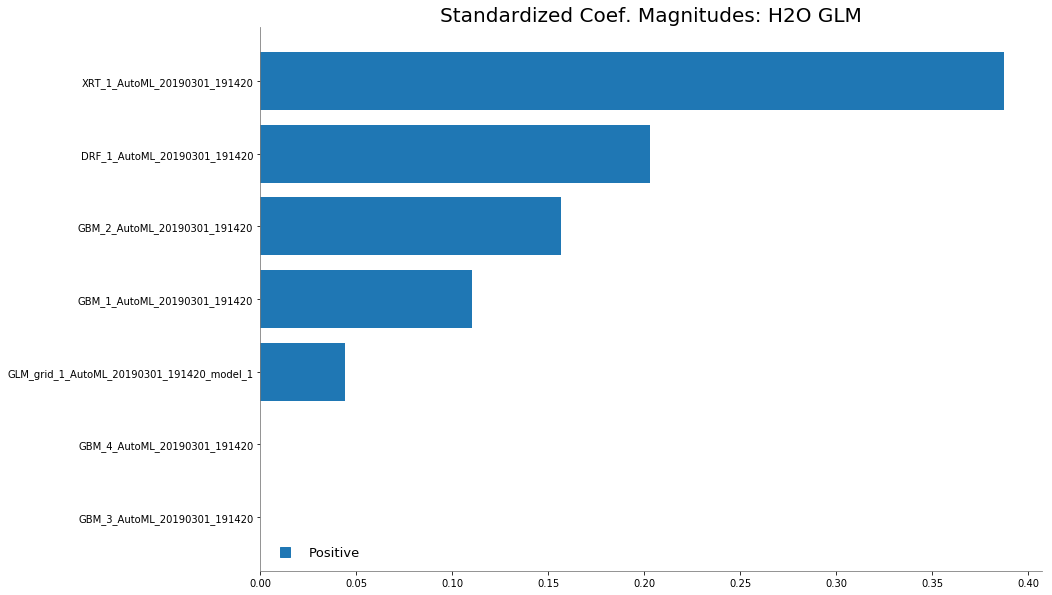

In [533]:
%matplotlib inline
metalearner.std_coef_plot()

In [534]:
##Getting a model directly by name

aml_leaderboard_df.head()

,model_id,auc,logloss,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_AutoML_20190301_191420,0.846014,0.193077,0.289840,0.227027,0.051541
1,StackedEnsemble_BestOfFamily_AutoML_20190301_191420,0.844625,0.193601,0.282639,0.227554,0.051781
2,XRT_1_AutoML_20190301_191420,0.842994,0.186246,0.288015,0.225174,0.050703
3,GBM_4_AutoML_20190301_191420,0.839511,0.188284,0.283848,0.226430,0.051270
4,GBM_3_AutoML_20190301_191420,0.837898,0.187452,0.286148,0.225375,0.050794


In [535]:
m_id=''
for model in aml_leaderboard_df['model_id']:
    if 'StackedEnsemble' not in model:
      print (model)
      if m_id=='':
            m_id=model
print ("model_id ", m_id)

XRT_1_AutoML_20190301_191420
GBM_4_AutoML_20190301_191420
GBM_3_AutoML_20190301_191420
GBM_2_AutoML_20190301_191420
DRF_1_AutoML_20190301_191420
GBM_1_AutoML_20190301_191420
GLM_grid_1_AutoML_20190301_191420_model_1
model_id  XRT_1_AutoML_20190301_191420


In [536]:
non_stacked= h2o.get_model(m_id)
print (non_stacked.algo)

drf


In [537]:
dir(non_stacked)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_and_save_parm',
 '_check_targets',
 '_compute_algo',
 '_end_time',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_run_time',
 '_start_time',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'balance_classes',
 'biases',
 'binomial_double_trees',
 'build_tree_one_node',
 'calibrate_model',
 'calibration_

    Note that since this is a pandas dataframe the data can be saved.

    The type of exploration depends on the learner. If the learner isn't an ensemble then ensemble exploration doesn't make sense.

    Examine the variable importance of the metalearner (combiner) algorithm in the ensemble. This shows us how much each base learner is contributing to the ensemble. The AutoML Stacked Ensembles use the default metalearner algorithm (GLM with non-negative weights), so the variable importance of the metalearner is actually the standardized coefficient magnitudes of the GLM.

### Making predictions
If one wants predictions the user will do this on new data.

Here we are taking 10% of original file just to show the syntax

In [540]:

# split into training and test for showing how to predict
train, test = df.split_frame([0.8])

### Predict Using Leader Model
    If you need to generate predictions on a test set, you can make predictions on the "H2OAutoML" object directly, or on the leader model object.

In [541]:
pred = aml.predict(test)
pred.head()

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
1,0.80625,0.19375
0,0.971178,0.0288224
0,0.967863,0.0321365
1,0.0795171,0.920483
0,0.968169,0.031831
0,0.964198,0.0358019
0,0.967335,0.0326655
0,0.969222,0.030778
0,0.969324,0.0306757
0,0.942102,0.0578982


### Model_performance()
    The standard model_performance() method can be applied to the AutoML leader model and a test set to generate an H2O model performance object.

In [543]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.032040594260232126
RMSE: 0.17899886664510511
LogLoss: 0.13046539652303094
Null degrees of freedom: 22467
Residual degrees of freedom: 22462
Null deviance: 11064.850271582705
Residual deviance: 5862.593058158918
AIC: 5874.593058158918
AUC: 0.9574366388149465
pr_auc: 0.7669475262655542
Gini: 0.9148732776298929
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2122626882917041: 


,0,1,Error,Rate
0,20677.0,282.0,0.0135,(282.0/20959.0)
1,564.0,945.0,0.3738,(564.0/1509.0)
Total,21241.0,1227.0,0.0377,(846.0/22468.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2122627,0.6907895,224.0
max f2,0.0774005,0.7034176,305.0
max f0point5,0.3425624,0.7937903,177.0
max accuracy,0.3360771,0.9651949,180.0
max precision,0.9676722,1.0,0.0
max recall,0.0320721,1.0,382.0
max specificity,0.9676722,1.0,0.0
max absolute_mcc,0.3360771,0.6834495,180.0
max min_per_class_accuracy,0.0506516,0.8721007,336.0
max mean_per_class_accuracy,0.0604368,0.8771546,323.0


Gains/Lift Table: Avg response rate:  6.72 %, avg score:  6.96 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100142,0.8510864,14.8893307,14.8893307,1.0,0.9062140,1.0,0.9062140,0.1491054,0.1491054,1388.9330683,1388.9330683
,2,0.0200285,0.7018738,14.8893307,14.8893307,1.0,0.7798704,1.0,0.8430422,0.1491054,0.2982107,1388.9330683,1388.9330683
,3,0.0300427,0.5005474,13.6320094,14.4702236,0.9155556,0.6071139,0.9718519,0.7643994,0.1365142,0.4347250,1263.2009425,1347.0223597
,4,0.0400125,0.3437209,10.2364148,13.4153035,0.6875,0.4172806,0.9010011,0.6779093,0.1020543,0.5367793,923.6414844,1241.5303507
,5,0.0500267,0.2389833,6.2204315,11.9750489,0.4177778,0.2856843,0.8042705,0.5993945,0.0622929,0.5990722,522.0431485,1097.5048876
,6,0.1000089,0.0870264,3.3146328,7.6467680,0.2226180,0.1398518,0.5135737,0.3697254,0.1656726,0.7647449,231.4632832,664.6767961
,7,0.1500356,0.0571831,1.7485691,5.6801184,0.1174377,0.0696844,0.3814892,0.2696821,0.0874751,0.8522200,74.8569084,468.0118439
,8,0.2000178,0.0461530,0.9015801,4.4860155,0.0605521,0.0507446,0.3012906,0.2149721,0.0450630,0.8972830,-9.8419870,348.6015519
,9,0.3000267,0.0379719,0.6957631,3.2225981,0.0467290,0.0410916,0.2164367,0.1570119,0.0695825,0.9668655,-30.4236884,222.2598052
,10,0.3999911,0.0355059,0.2055072,2.4685771,0.0138023,0.0365417,0.1657950,0.1269044,0.0205434,0.9874089,-79.4492764,146.8577136


In [544]:
dir(perf)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_algo',
 '_bc',
 '_bcin',
 '_has',
 '_metric_json',
 '_on_train',
 '_on_valid',
 '_on_xval',
 'accuracy',
 'aic',
 'auc',
 'confusion_matrix',
 'custom_metric_name',
 'custom_metric_value',
 'error',
 'fallout',
 'find_idx_by_threshold',
 'find_threshold_by_max_metric',
 'fnr',
 'fpr',
 'fprs',
 'gains_lift',
 'gini',
 'logloss',
 'mae',
 'make',
 'max_per_class_error',
 'mcc',
 'mean_per_class_error',
 'mean_residual_deviance',
 'metric',
 'missrate',
 'mse',
 'nobs',
 'null_degrees_of_freedom',
 'null_deviance',
 'plot',
 'pr_auc',
 'precision',
 'r2',
 'recall

In [545]:
d=perf.confusion_matrix()
d

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2122626882917041: 


,0,1,Error,Rate
0,20677.0,282.0,0.0135,(282.0/20959.0)
1,564.0,945.0,0.3738,(564.0/1509.0)
Total,21241.0,1227.0,0.0377,(846.0/22468.0)


In [547]:

aml.leader.algo

'stackedensemble'

In [548]:

aml.leader.model_performance(test).auc()

0.9574366388149465

In [549]:
best_perf = aml.leader.model_performance()
best_perf


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.03239951153450588
RMSE: 0.1799986431462912
LogLoss: 0.13116402575786068
Null degrees of freedom: 112322
Residual degrees of freedom: 112317
Null deviance: 55321.887173928204
Residual deviance: 29465.473730400365
AIC: 29477.473730400365
AUC: 0.9572753240493919
pr_auc: 0.7652022030920781
Gini: 0.9145506480987837
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22090517696777381: 


,0,1,Error,Rate
0,103430.0,1348.0,0.0129,(1348.0/104778.0)
1,2918.0,4627.0,0.3867,(2918.0/7545.0)
Total,106348.0,5975.0,0.038,(4266.0/112323.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2209052,0.6844675,229.0
max f2,0.0771493,0.7037543,310.0
max f0point5,0.4030843,0.7845523,164.0
max accuracy,0.3235440,0.9643172,191.0
max precision,0.9671882,1.0,0.0
max recall,0.0303675,1.0,390.0
max specificity,0.9671882,1.0,0.0
max absolute_mcc,0.2944166,0.6753270,201.0
max min_per_class_accuracy,0.0498895,0.8737139,340.0
max mean_per_class_accuracy,0.0524583,0.8753484,336.0


Gains/Lift Table: Avg response rate:  6.72 %, avg score:  6.92 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100069,0.8506473,14.8738328,14.8738328,0.9991103,0.9057318,0.9991103,0.9057318,0.1488403,0.1488403,1387.3832804,1387.3832804
,2,0.0200048,0.6933877,14.8075384,14.8407003,0.9946572,0.7770568,0.9968847,0.8414229,0.1480451,0.2968854,1380.7538385,1384.0700346
,3,0.0300028,0.4911331,13.3228076,14.3348862,0.8949243,0.5921181,0.9629080,0.7583460,0.1332008,0.4300861,1232.2807589,1333.4886232
,4,0.0400007,0.3385809,9.9556502,13.2403209,0.6687444,0.4082538,0.8893835,0.6708424,0.0995361,0.5296223,895.5650248,1224.0320906
,5,0.0500076,0.2421070,6.6223655,11.9160229,0.4448399,0.2861905,0.8004273,0.5938709,0.0662691,0.5958913,562.2365451,1091.6022894
,6,0.1000062,0.0854383,3.4858453,7.7013093,0.2341524,0.1394783,0.5173151,0.3666948,0.1742876,0.7701789,248.5845256,670.1309317
,7,0.1500049,0.0559268,1.5772456,5.6600759,0.1059473,0.0676760,0.3802006,0.2670278,0.0788602,0.8490391,57.7245572,466.0075891
,8,0.2000036,0.0456435,0.9622523,4.4856723,0.0646368,0.0500745,0.3013132,0.2127919,0.0481113,0.8971504,-3.7747659,348.5672283
,9,0.3000009,0.0378336,0.6812641,3.2175738,0.0457621,0.0408295,0.2161320,0.1554728,0.0681246,0.9652750,-31.8735946,221.7573840
,10,0.3999982,0.0354307,0.2306225,2.4708526,0.0154915,0.0364689,0.1659730,0.1257225,0.0230616,0.9883366,-76.9377538,147.0852616


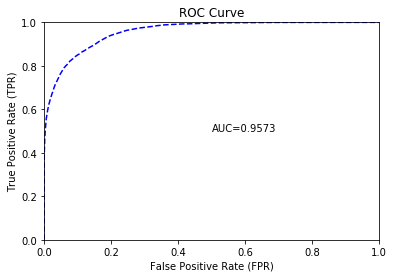

In [550]:
best_perf.plot()

     AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)
 
    An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability and Our AUC Value is 0.9573.
    

In [551]:
aml.leader.confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22090517696777381: 


,0,1,Error,Rate
0,103430.0,1348.0,0.0129,(1348.0/104778.0)
1,2918.0,4627.0,0.3867,(2918.0/7545.0)
Total,106348.0,5975.0,0.038,(4266.0/112323.0)


In [620]:

h2o.cluster().shutdown()

H2O session _sid_b6e7 closed.



#### Perform Feature Engineering
    The goal of this section is to improve upon these predictors through a number of feature engineering steps. 

    

In [621]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn import preprocessing,model_selection
import itertools


In [628]:
fileaddress = "C:\\Users\\Spurthy\\Documents"
df = pd.read_csv(fileaddress+"\\cs-training.csv")
print ("training dataset shape is {}".format(df.shape))


training dataset shape is (112323, 11)


In [623]:
col_names = df.columns.values
col_names[0] = 'ID' ## rename first column to ID
df.columns = col_names ## assign new column name to training dataset


In [629]:
print ("Take a peek at training dataset")
df.head()

Take a peek at training dataset


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
1,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
2,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
3,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
4,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0


In [624]:
print(df.dtypes)

ID                                               int64
revolving_utilization_of_unsecured_lines       float64
age                                              int64
number_of_time30-59_days_past_due_not_worse      int64
debt_ratio                                     float64
monthly_income                                 float64
number_of_open_credit_lines_and_loans            int64
number_of_times90_days_late                      int64
number_real_estate_loans_or_lines                int64
number_of_time60-89_days_past_due_not_worse      int64
number_of_dependents                           float64
dtype: object


     Distribution of following features are highly skewed.

     RevolvingUtilizationOfUnsecuredLines
     NumberOfTime30-59DaysPastDueNotWorse
     DebtRatio
     NumberOfTimes30DaysLate
     NumberRealEstateLoansOrLines
     NumberOfTime60-89DaysPastDueNotWorse
     Take a log transformation to see if distribution can be less skewed.

C:\Users\Spurthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


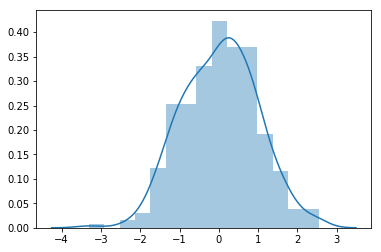

In [625]:
x = np.random.normal(size=333)
sns.distplot(x)

count    112323.000000
mean          0.067172
std           0.250321
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: serious_dlqin2yrs, dtype: float64


C:\Users\Spurthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


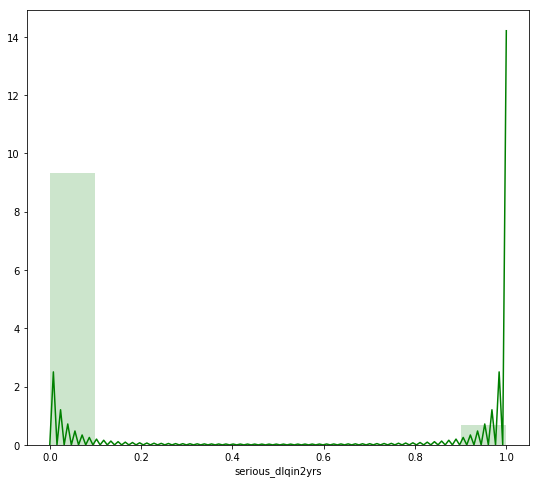

In [630]:
print(df['serious_dlqin2yrs'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['serious_dlqin2yrs'], color='g', bins=10, hist_kws={'alpha': 0.2})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000171D46C67F0>,
      dtype=object)

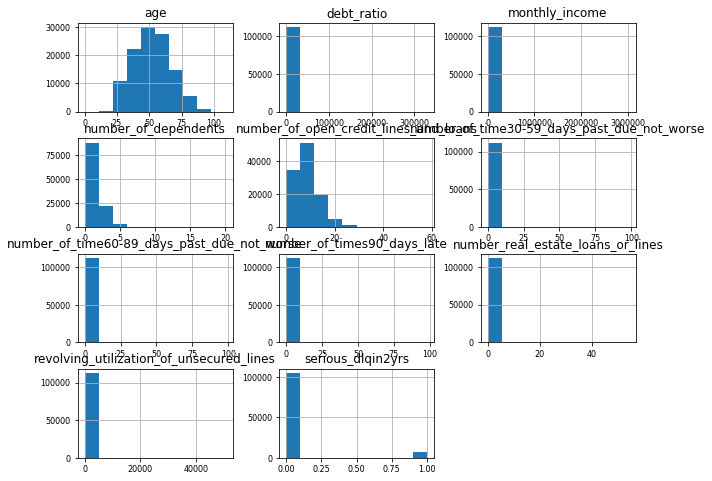

In [633]:
df_num.hist(figsize=(10, 8), bins=10, xlabelsize=8, ylabelsize=8)

In [636]:
df_num_corr = df_num.corr()['serious_dlqin2yrs'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SeriousDlqin2yrs:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with SeriousDlqin2yrs:
serious_dlqin2yrs    1.0
Name: serious_dlqin2yrs, dtype: float64


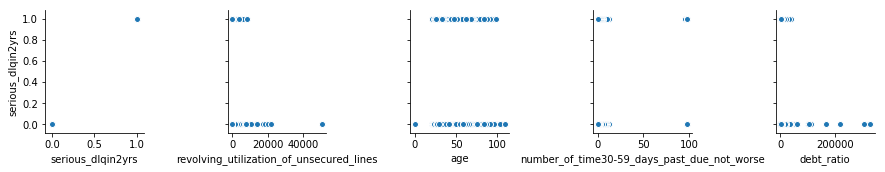

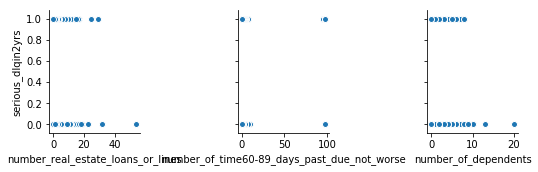

In [639]:
for i in range(0, len(df_num.columns), 8):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['serious_dlqin2yrs'])

In [117]:
print (df.columns.values)

['ID' 'SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


Distribution after log transformation

C:\Users\Spurthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


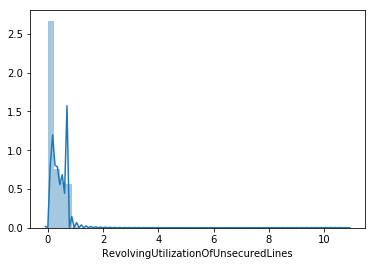

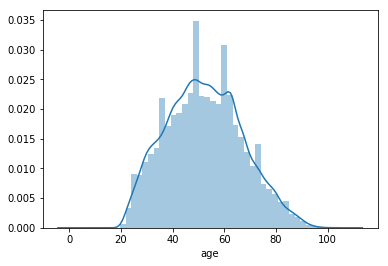

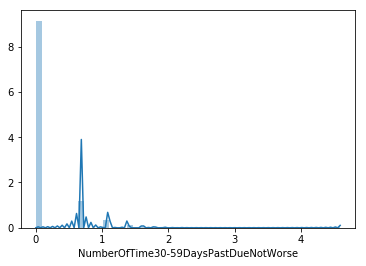

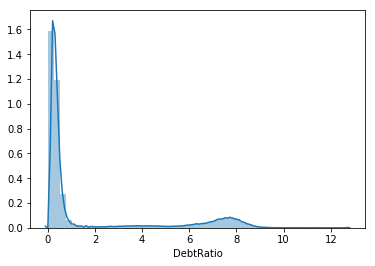

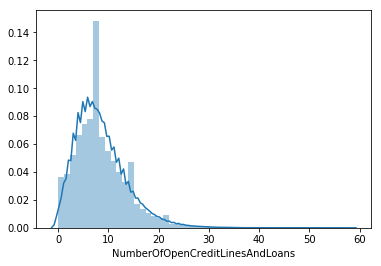

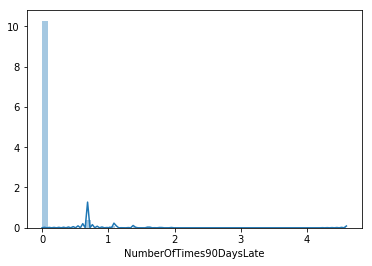

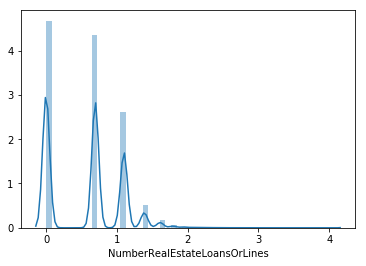

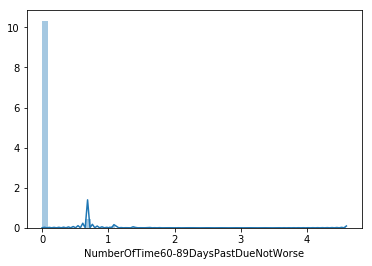

In [119]:

for each in feature_list:
    sns.distplot(df[each])
    plt.show()

The distribution after transformation is much less skewed. We may able to put them into machine learning algorithm later.

Remove nan values in "MonthlyIncome" and "NumberOfDependents" to check their distribution

C:\Users\Spurthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


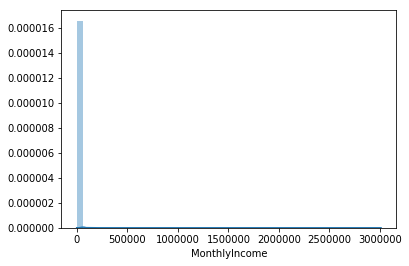

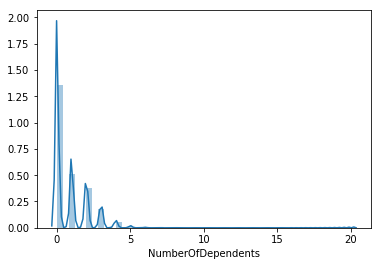

In [120]:
partial_df = df[['MonthlyIncome','NumberOfDependents']]
#partial_train_df.dropna(how='any')
partial_df = partial_df.dropna(how='any')

sns.distplot(partial_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_df['NumberOfDependents'])
plt.show()

monthlyIncome is highly skewed. let us take log transformation on both then check their distribution again

C:\Users\Spurthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


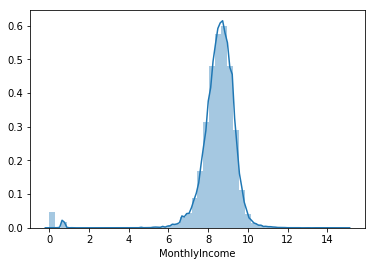

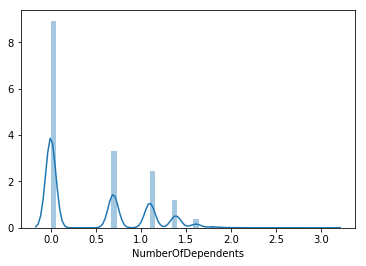

In [121]:
partial_df['MonthlyIncome'] = np.log(1+partial_df['MonthlyIncome'].values)
partial_df['NumberOfDependents'] = np.log(1+partial_df['NumberOfDependents'].values)
sns.distplot(partial_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_df['NumberOfDependents'])
plt.show()

Post transformation looks better than before. I will keep log transformation on both at this time.

check nan values in training set

In [123]:
print (pd.isnull(df).sum(axis=0))

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64



Since the feature "Monthly Income" and "Number of Dependents" have many nan values in it. We create new features to see if observations with nan values in these two features are indictive for serious dlinquency rate

In [124]:
df['MonthlyIncome_Null'] = pd.isnull(df['MonthlyIncome'])
grouped_df = df.groupby('MonthlyIncome_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,MonthlyIncome_Null,SeriousDlqin2yrs
0,False,0.069486
1,True,0.056137


In [125]:
df['NoD_Null'] = pd.isnull(df['NumberOfDependents'])
grouped_df = df.groupby('NoD_Null')
Dlqin = grouped_df['SeriousDlqin2yrs'].aggregate(np.mean).reset_index()
Dlqin

,NoD_Null,SeriousDlqin2yrs
0,False,0.067410
1,True,0.045617


It seems observations with nan values in "Monthly Income" or/and "Number of Dpendents" have lower deliquency rate than those with valid values.

In [126]:
print(df.shape,type(df))
df.dropna(axis=0,how='any',subset=['NumberOfDependents'],inplace=True)
df.reset_index()
print(df.shape)
pd.isnull(df).sum(axis=0)

(150000, 14) <class 'pandas.core.frame.DataFrame'>
(146076, 14)


ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           25807
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
MonthlyIncome_Null                          0
NoD_Null                                    0
dtype: int64

### Conclusion:¶
   
 - The best model for both Classification and regression is Stacked Ensemble
 - The best AUC score we got is 0.9538828675746901 whereas the best AUC in Kaggle is 0.869558
 - The best logloss score is 0.13823047113084244
 - The best RMSE Value is 0.18729468157687296
   
The closer to 1 a models AUC score is, the BETTER it is. However, the best model is Stacked Ensamble with an AUC Score of 0.953.

### Contributions:
 * Performed H2o auto ML and found out the best model for regression and classification
 * Found out the best AUC, RMSE and Logloss scores for the trained dataset.
 * Did Ensemble Exploration where I slpit the test and train data and got the best scores for the test data as well.
 * Did Some feature Engineering where I applied log transormation for Highly skewed features.
 * Explained the code throughout.

### Citation:

    Kaggle and few Data analysis Algorithms -  www.Kaggle.com
    Regression and Classification -  https://www.analyticsvidhya.com/blog/
    Ensemble methods -  https://scikit-learn.org/stable/modules/ensemble.html
    H2o - https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O


### License: 

    Copyright 2019 SPOORTHI BELLAM

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.